<a href="https://colab.research.google.com/github/tom-locatelli47/Python/blob/main/POO_Design_Patterns_(Padr%C3%B5es_de_Projeto)_Observer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

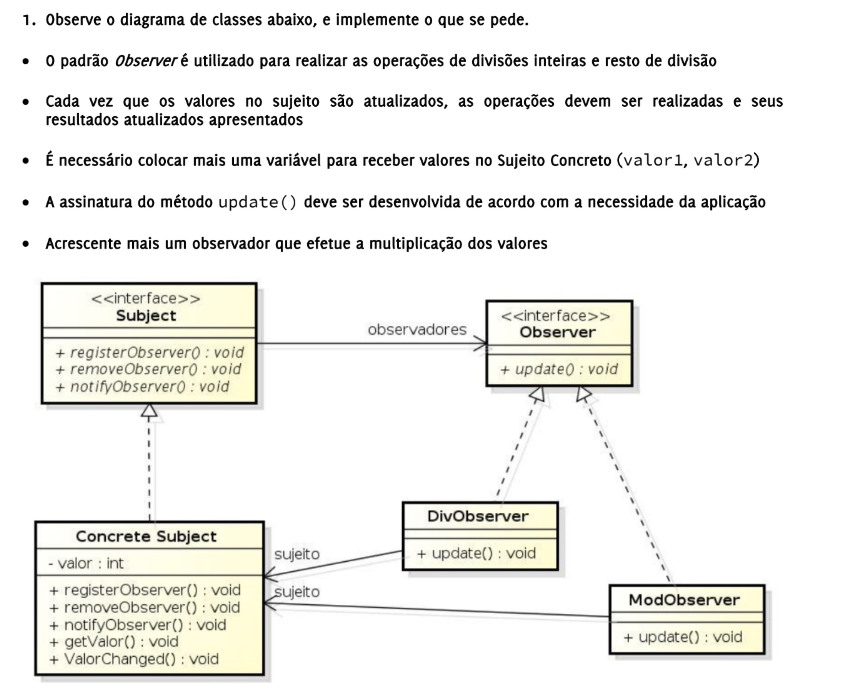

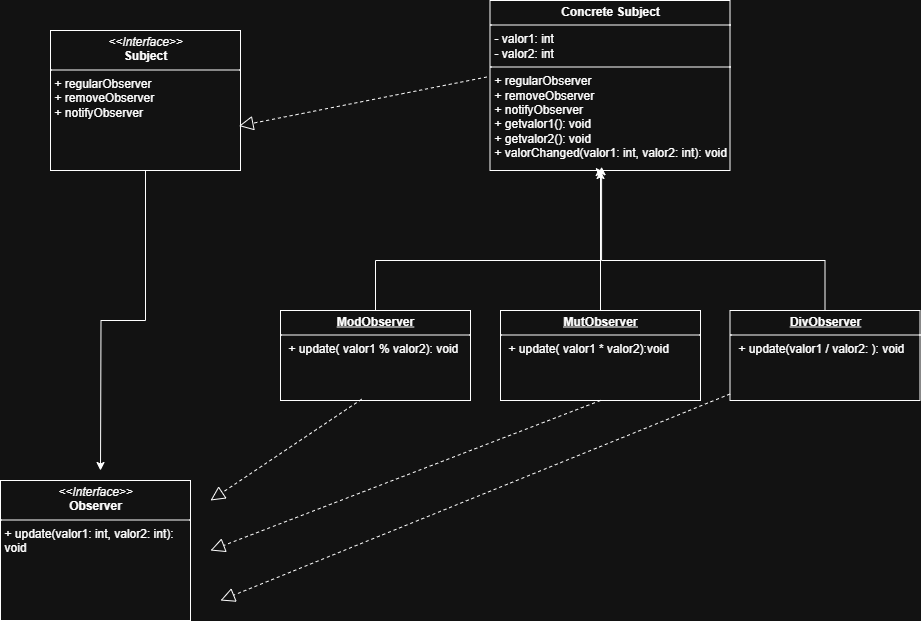

In [ ]:
from abc import ABC, abstractmethod

# ===== Subject Interface =====

class Subject(ABC):
    @abstractmethod
    def registerObserver(self, observer):
        pass

    @abstractmethod
    def removeObserver(self, observer):
        pass

    @abstractmethod
    def notifyObservers(self):
        pass


# ===== Concrete Subject =====

class ConcreteSubject(Subject):
    def __init__(self):
        self.observers = []
        self.valor1 = 0
        self.valor2 = 1

    def registerObserver(self, observer):
        self.observers.append(observer)

    def removeObserver(self, observer):
        self.observers.remove(observer)

    def notifyObservers(self):
        for observer in self.observers:
            observer.update(self.valor1, self.valor2)

    def setValores(self, v1, v2):
        self.valor1 = v1
        self.valor2 = v2
        print(f"\nValores atualizados: v1={v1}, v2={v2}\n")
        self.notifyObservers()


# ===== Observer Interface =====
class Observer(ABC):
    @abstractmethod
    def update(self, v1, v2):
        pass


# ===== Observadores Concretos =====
class DivObserver(Observer):
    def update(self, v1, v2):
        if v2 != 0:
            print(f"Divisão inteira: {v1} // {v2} = {v1 // v2}")
        else:
          print("Divisão inteira: divisão por zero não permitida!")


class ModObserver(Observer):
    def update(self, v1, v2):
        if v2 != 0:
            print(f"Resto da divisão: {v1} % {v2} = {v1 % v2}")
        else:
            print("Resto: divisão por zero não permitida!")


class MulObserver(Observer):
    def update(self, v1, v2):
        print(f"Multiplicação: {v1} * {v2} = {v1 * v2}")
        print("================================")



if __name__ == "__main__":
    print("===== Observer Pattern =====\n")

    # Criar sujeito
    subject = ConcreteSubject()

    # Registrar observadores
    subject.registerObserver(DivObserver())
    subject.registerObserver(ModObserver())
    subject.registerObserver(MulObserver())

    # Atualizar valores -> dispara notificações
    subject.setValores(10, 3)
    subject.setValores(20, 5)
    subject.setValores(7, 0)  # caso divisão por zero


===== Observer Pattern =====


Valores atualizados: v1=10, v2=3

Divisão inteira: 10 // 3 = 3
Resto da divisão: 10 % 3 = 1
Multiplicação: 10 * 3 = 30

Valores atualizados: v1=20, v2=5

Divisão inteira: 20 // 5 = 4
Resto da divisão: 20 % 5 = 0
Multiplicação: 20 * 5 = 100

Valores atualizados: v1=7, v2=0

Divisão inteira: divisão por zero não permitida!
Resto: divisão por zero não permitida!
Multiplicação: 7 * 0 = 0


**Questão 2**

In [ ]:
from abc import ABC, abstractmethod

# ===== Subject (Observable) =====
class Subject(ABC):
    @abstractmethod
    def registerObserver(self, observer):
        pass

    @abstractmethod
    def removeObserver(self, observer):
        pass

    @abstractmethod
    def notifyObservers(self):
        pass


# ===== Concrete Subject: Reuters =====
class Reuters(Subject):
    def __init__(self):
        self.observers = []
        self.breaking_news = None

    def registerObserver(self, observer):
        self.observers.append(observer)

    def removeObserver(self, observer):
        self.observers.remove(observer)

    def notifyObservers(self):
        for observer in self.observers:
            observer.update(self.breaking_news)

    def setBreakingNews(self, news):
        self.breaking_news = news
        print(f"\n[Reuters] Última hora: {news}")
        self.notifyObservers()


# ===== Observer (Subscriber) =====
class Observer(ABC):
    @abstractmethod
    def update(self, news):
        pass


# ===== Concrete Observers (TV Channels) =====
class CNN(Observer):
    def update(self, news):
        print(f"[CNN] Notícia recebida: {news}")


class FoxNews(Observer):
    def update(self, news):
        print(f"[Fox News] Notícia recebida: {news}")


class BBC(Observer):
    def update(self, news):
        print(f"[BBC] Notícia recebida: {news}")


# ===== Exemplo de uso =====
if __name__ == "__main__":
    print("\n===== Observer Pattern - Reuters =====")
    # Criar sujeito (Reuters)
    reuters = Reuters()

    # Criar observadores (Canais de TV)
    cnn = CNN()
    fox = FoxNews()
    bbc = BBC()

    # Inscrever canais na Reuters
    reuters.registerObserver(cnn)
    reuters.registerObserver(fox)
    reuters.registerObserver(bbc)

    # Nova notícia - todos são notificados automaticamente
    reuters.setBreakingNews("Eleições presidenciais começam hoje.")
    reuters.setBreakingNews("Mercado financeiro registra forte alta.")



===== Observer Pattern - Reuters =====

[Reuters] Última hora: Eleições presidenciais começam hoje.
[CNN] Notícia recebida: Eleições presidenciais começam hoje.
[Fox News] Notícia recebida: Eleições presidenciais começam hoje.
[BBC] Notícia recebida: Eleições presidenciais começam hoje.

[Reuters] Última hora: Mercado financeiro registra forte alta.
[CNN] Notícia recebida: Mercado financeiro registra forte alta.
[Fox News] Notícia recebida: Mercado financeiro registra forte alta.
[BBC] Notícia recebida: Mercado financeiro registra forte alta.
